In [4]:
using Gadfly

# Caractérisation de la GEV

## Densité 


### Implémentation

In [48]:
function pdfGEV(z::Real; μ::Real, σ::Real, ξ::Real) 
    if ξ == 0
        return 1/σ * exp(-(z - μ)/σ) * exp(-exp(-(z - μ)/σ))
    else
        return 1/σ * (1 + ξ * (z - μ) / σ)^(-1/ξ - 1) * exp(-(1 + ξ * (z - μ) / σ)^(-1/ξ))
    end
end;

### Détermination du support

In [94]:
μ = 150.0
σ = 20.0
ξ = 0.4;

In [95]:
function supportGEV(μ, σ, ξ)
    L = μ - σ/ξ
    if ξ > 0
        println("[$L; +inf]")
    else
        println("[-inf; $L]")
    end
end

supportGEV(μ, σ, ξ);

[100.0; +inf]


In [96]:
z = 100:0.1:200;

### Tracé

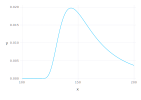

In [97]:
plot(x=z, y=pdfGEV.(z, μ=μ, σ=σ, ξ=ξ), Geom.line)

## Fonction de répartition

Rappel : $G(z) = P(Z < z)$ où $Z \sim GEV(\mu, \sigma, \xi)$

### Implémentation

In [82]:
function cdfGEV(z::Real; μ::Real, σ::Real, ξ::Real)
    if ξ == 0
        exp(-exp(-(z - μ) / σ))
    else
        return exp(-(1 + ξ * (z - μ) / σ)^(-1/ξ))
    end
end;

### Tracé

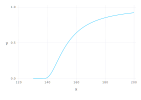

In [83]:
plot(x=z, y=cdfGEV.(z, μ=μ, σ=σ, ξ=ξ), Geom.line)